In [23]:
import pandas as pd
import sklearn
import mglearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

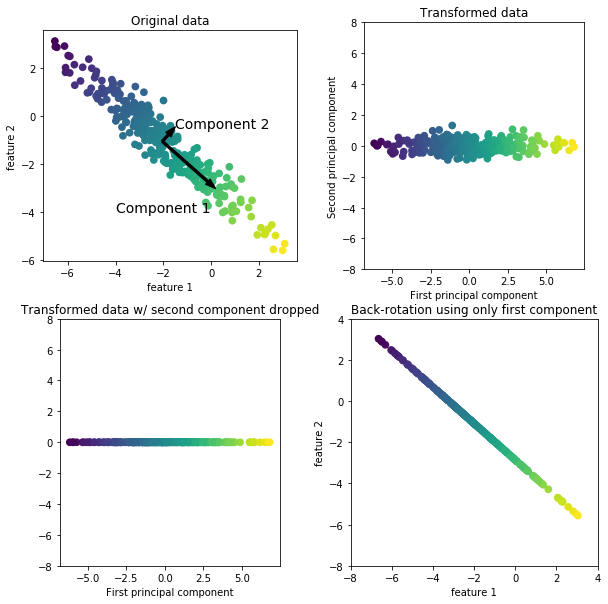

In [2]:
#Muestra lo que hace el algoritmo del PCA
mglearn.plots.plot_pca_illustration()

In [3]:
plt.show()

In [4]:
# Base de datos de  cáncer de mama
cancer=load_breast_cancer()
print(cancer.feature_names)
print(cancer.feature_names.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(30,)


In [24]:
pd.DataFrame(cancer.data).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
pca=PCA(n_components=2)
pca.fit(cancer.data)
transformada=pca.transform(cancer.data)
print(cancer.data.shape)
print(transformada.shape)

(569, 30)
(569, 2)


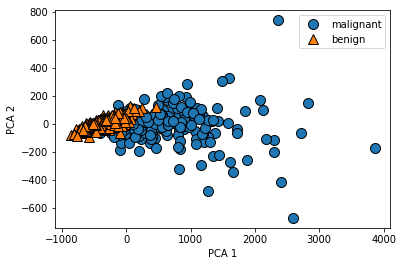

In [6]:
# Graficar componentes principales     
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

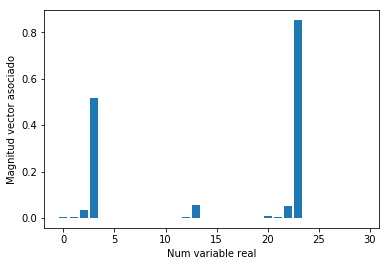

In [7]:
#Escalar los datos
#escala=MinMaxScaler()
#escala.fit(cancer.data)
#escalada=escala.transform(cancer.data)
#pca.fit(escalada)
#transformada=pca.transform(escalada)
#mglearn.discrete_scatter(transformada[:,0],transformada[:,1], cancer.target)
#plt.legend(cancer.target_names,loc='best')
#plt.gca()
#plt.xlabel('PCA 1')
#plt.ylabel('PCA 2')
#plt.show()
#%% Comprobar hasta cuantas dimensiones es posible reducir
import numpy as np
w,v = np.linalg.eig(pca.get_covariance()) # Calcular los vectores y valores propios de la martiz de covarianza
indx = np.argsort(w)[::-1] # ordenar los valores de mayor a menor
porcentaje = w[indx]/np.sum(w) # calcular el procentaje de varianza en cada componente
porcent_acum = np.cumsum(porcentaje) # calcular el porcentaje acumulado de los componentes

#%% Verificar el aporte de cada variable en un 
#componente principal
matrix_transform = pca.components_.T
# La matriz de transformacion tiene como columnas 
#el vector propio asociado a cada componente principal
# La magnitud de cada elemento de ese vector propio es 
#el aporte de cada variable en ese componente principal

# Graficamente ese aporte se puede ver si graficamos 
#el vector propio
plt.bar(np.arange(30),matrix_transform[:,0])
plt.xlabel('Num variable real')
plt.ylabel('Magnitud vector asociado')
plt.show()

In [15]:
np.round(porcentaje,2)

array([0.98+0.j, 0.02+0.j, 0.  +0.j, 0.  -0.j, 0.  +0.j, 0.  -0.j,
       0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
       0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
       0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  -0.j, 0.  +0.j, 0.  +0.j,
       0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j])

In [17]:
np.round(porcent_acum, 4)

array([0.982 +0.j, 0.9982+0.j, 0.9983+0.j, 0.9983+0.j, 0.9984+0.j,
       0.9985+0.j, 0.9985+0.j, 0.9986+0.j, 0.9987+0.j, 0.9987+0.j,
       0.9988+0.j, 0.9989+0.j, 0.9989+0.j, 0.999 +0.j, 0.999 +0.j,
       0.9991+0.j, 0.9992+0.j, 0.9992+0.j, 0.9993+0.j, 0.9994+0.j,
       0.9994+0.j, 0.9995+0.j, 0.9996+0.j, 0.9996+0.j, 0.9997+0.j,
       0.9997+0.j, 0.9998+0.j, 0.9999+0.j, 0.9999+0.j, 1.    +0.j])